In [93]:
# Dependencies
import requests
import json
from pprint import pprint
import sqlite3
import pandas as pd

In [94]:
# Api keys and ID
app_id = "130c281c"
app_key = "f5d8adb2213c2be776f6123bb77488ee"

In [95]:
# Defining the URL
base_url = "https://api.edamam.com/api/recipes/v2"

# Declaring params we are searching for
# type(private/public),q(food type),app_id,app_key,co2EmissionsClass(A+-G),

In [96]:
# Update Params
params = {
    'type':'public',
    'q':'chicken',
    'app_id': app_id,
    'app_key': app_key
}

# Get request
response = requests.get(base_url, params=params)
data = response.json()

pprint(data)


{'_links': {'next': {'href': 'https://api.edamam.com/api/recipes/v2?q=chicken&app_key=f5d8adb2213c2be776f6123bb77488ee&_cont=CHcVQBtNNQphDmgVQntAEX4BYldtAAIARGdBAGAbZFZ2BwYFUXlSCmpFNVEiAgQPRmxIBmsRagN0DVEEEDFCBTQUZVcgB1IVLnlSVSBMPkd5BgNK&type=public&app_id=130c281c',
                     'title': 'Next page'}},
 'count': 10000,
 'from': 1,
 'hits': [{'_links': {'self': {'href': 'https://api.edamam.com/api/recipes/v2/b79327d05b8e5b838ad6cfd9576b30b6?type=public&app_id=130c281c&app_key=f5d8adb2213c2be776f6123bb77488ee',
                               'title': 'Self'}},
           'recipe': {'calories': 4228.043058200812,
                      'cautions': ['Sulfites'],
                      'co2EmissionsClass': 'G',
                      'cuisineType': ['italian'],
                      'dietLabels': ['Low-Carb'],
                      'digest': [{'daily': 422.8934243674497,
                                  'hasRDI': True,
                                  'label': 'Fat',
               

          {'_links': {'self': {'href': 'https://api.edamam.com/api/recipes/v2/5ab36d4181b4f838057a0b46ac7df041?type=public&app_id=130c281c&app_key=f5d8adb2213c2be776f6123bb77488ee',
                               'title': 'Self'}},
           'recipe': {'calories': 3011.079093748152,
                      'cautions': ['Sulfites'],
                      'co2EmissionsClass': 'F',
                      'cuisineType': ['french'],
                      'dietLabels': [],
                      'digest': [{'daily': 246.7047776440495,
                                  'hasRDI': True,
                                  'label': 'Fat',
                                  'schemaOrgTag': 'fatContent',
                                  'sub': [{'daily': 247.34199218715122,
                                           'hasRDI': True,
                                           'label': 'Saturated',
                                           'schemaOrgTag': 'saturatedFatContent',
                          

In [97]:
# Check to see if we can pull the data

print(data['hits'][0]['recipe']['cuisineType'])

['italian']


In [98]:
# attempting for loop to concatenate for chicken recipes

# Create IDs column for 200 records
created_ids = range(0,200)
recipe_id = (list(created_ids))

# For loop to create chicken recipe table
recipe_list = []
cuisine_type = []
total_calories = []
calories_per_serving = []
recipe_source = []
total_time = []
total_co2 = []
emission_class = []
number_of_ingredients = []
diet_labels = []
total_weight = []

for i in range(0,10):
    linkref = data['_links']['next']['href']
    response_data = requests.get(linkref)
    new_data = response_data.json()['hits']
    data = response_data.json()
    for i in new_data:
        names = i['recipe']['label']
        cuisines = i['recipe']['cuisineType']
        calories = i['recipe']['calories']
        source = i['recipe']['source']
        time = i['recipe']['totalTime']
        per_serving = i['recipe']['calories']/i['recipe']['yield']
        co2 = i['recipe']['totalCO2Emissions']
        classes = i['recipe']['co2EmissionsClass']
        ingredients = len(i['recipe']['ingredients'])
        diet = i['recipe']['dietLabels']
        weight = i['recipe']['totalWeight']        
        
        recipe_list.append(names)
        cuisine_type.append(cuisines)
        total_calories.append(calories)
        recipe_source.append(source)
        total_time.append(time)
        calories_per_serving.append(per_serving)
        total_co2.append(co2)
        emission_class.append(classes)
        number_of_ingredients.append(ingredients)
        diet_labels.append(diet)
        total_weight.append(weight)
        
    # Checking number of ingredients list to see if data was recorded
print(number_of_ingredients)

[2, 2, 6, 6, 6, 2, 12, 17, 10, 7, 11, 8, 3, 3, 17, 6, 10, 14, 9, 9, 9, 8, 8, 8, 8, 18, 7, 10, 3, 12, 6, 2, 11, 9, 10, 3, 5, 8, 5, 11, 6, 8, 15, 8, 4, 5, 8, 6, 5, 9, 10, 10, 9, 5, 9, 9, 14, 3, 12, 7, 13, 5, 14, 5, 7, 7, 10, 11, 11, 12, 14, 11, 10, 13, 6, 11, 10, 14, 18, 5, 13, 4, 9, 9, 10, 8, 6, 11, 10, 11, 6, 10, 5, 13, 10, 3, 5, 12, 13, 13, 6, 10, 17, 7, 12, 8, 4, 7, 6, 11, 17, 11, 12, 9, 9, 13, 6, 11, 5, 7, 10, 12, 11, 7, 11, 9, 11, 10, 6, 4, 9, 11, 10, 8, 10, 12, 4, 11, 5, 13, 10, 13, 12, 8, 13, 12, 8, 10, 8, 5, 11, 6, 6, 13, 14, 5, 10, 4, 10, 15, 7, 6, 13, 15, 6, 11, 8, 6, 8, 6, 7, 13, 5, 11, 12, 11, 4, 12, 12, 14, 10, 12, 5, 14, 12, 13, 13, 6, 10, 12, 10, 15, 4, 15, 6, 6, 7, 8, 6, 6]


In [99]:
# Creating Chicken recipe Dataframe
chicken_recipe_df = pd.DataFrame({'recipe_id': recipe_id,
                                 'recipe_name': recipe_list,
                                 'cuisine_type': cuisine_type,
                                 'source': recipe_source,
                                 'total_time': total_time,
                                 'total_calories': total_calories,
                                 'calories_per_serving': calories_per_serving})
chicken_recipe_df.head(10)

,recipe_id,recipe_name,cuisine_type,source,total_time,total_calories,calories_per_serving
0,0,Poached Chicken for Tacos,[mexican],Cookstr,120.0,432.480000,216.240000
1,1,Chicken Broth,[american],Cookstr,240.0,117.308431,58.654216
2,2,Fig & Balsamic Chicken,[french],Food52,60.0,1040.234000,346.744667
3,3,Basic Roast Chicken,[american],Cookstr,120.0,3797.291855,632.881976
4,4,Ultimate Roast Chicken,[american],My Recipes,0.0,2196.939412,366.156569
5,5,Chicken & peppers,[american],The Stone Soup,130.0,1123.850000,561.925000
6,6,Chicken Tamales,[south american],Food Network,120.0,16433.274364,684.719765
7,7,Chicken biryani,[indian],BBC,60.0,2057.673000,1028.836500
8,8,Roast Chicken With Chicken Livers,[french],Food & Wine,0.0,3800.558906,316.713242
9,9,Chicken Carbonara,[italian],Delish,25.0,2072.423000,518.105750


In [100]:
# Creating CO2 Emissions Dataframe
co2_df = pd.DataFrame({'recipe_id': recipe_id,
                      'total_co2': total_co2,
                      'emission_class': emission_class,
                      'diet_labels': diet_labels,
                      'total_weight': total_weight,
                      'number_of_ingredients': number_of_ingredients})
co2_df.head(10)

,recipe_id,total_co2,emission_class,diet_labels,total_weight,number_of_ingredients
0,0,4026.960000,F,"[High-Protein, Low-Carb, Low-Sodium]",408.000000,2
1,1,13435.534076,G,"[Low-Carb, Low-Sodium]",54.783084,2
2,2,6575.985636,F,"[Low-Fat, Low-Sodium]",879.622222,6
3,3,27074.433030,G,[Low-Carb],2852.308290,6
4,4,13597.746146,F,[Low-Carb],1409.710267,6
5,5,7037.275000,G,[Low-Carb],947.500000,2
6,6,37443.976996,F,"[Balanced, High-Fiber]",4720.335568,12
7,7,7043.271562,G,[High-Fiber],1401.547222,17
8,8,19270.308929,F,[Low-Carb],2082.162893,10
9,9,5479.003138,F,[],1136.900000,7


In [130]:
# Export as CSV files
chicken_recipe_df.to_csv('Resources/chicken_recipe.csv', index=False)

co2_df.to_csv('Resources/co2.csv', index=False)

In [131]:
from sqlalchemy import create_engine, MetaData

# Create SQLite database and engine
engine = create_engine('sqlite:///recipe_info.sqlite', echo=True)

# Reflect the tables
metadata = MetaData()
metadata.reflect(bind=engine)

# Drop all tables
metadata.drop_all(bind=engine)

# Commit the changes
engine.dispose()

2024-01-31 21:50:08,257 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-31 21:50:08,262 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-01-31 21:50:08,263 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-31 21:50:08,266 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-01-31 21:50:08,267 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-31 21:50:08,268 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("chicken")
2024-01-31 21:50:08,269 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-31 21:50:08,272 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("co2_data")
2024-01-31 21:50:08,273 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-31 21:50:08,275 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 

In [132]:
chicken_recipe_df['cuisine_type'] = chicken_recipe_df['cuisine_type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


from sqlalchemy import create_engine

# Create SQLite database and engine
engine = create_engine('sqlite:///recipe_info.sqlite', echo=False)  # SQLite database file

In [136]:
# Convert the 'diet_labels' column to a string
co2_df['diet_labels'] = co2_df['diet_labels'].apply(lambda x: ', '.join(x) if x else '')

# Now, you can proceed with the to_sql() method
co2_df.to_sql('co2_data', con=engine, index=False, if_exists='replace')

chicken_recipe_df.to_sql('chicken_recipe', con=engine, index=False, if_exists='replace')

200

In [151]:
for table_name, table_obj in Base.metadata.tables.items():
    print(f"Table: {table_name}, Keys: {table_obj.c.keys()}")

Table: chicken_recipe, Keys: ['recipe_id', 'recipe_name', 'cuisine_type', 'source', 'total_time', 'total_calories', 'calories_per_serving']
Table: co2_data, Keys: ['recipe_id', 'total_co2', 'emission_class', 'diet_labels', 'total_weight', 'number_of_ingredients']


In [155]:
from sqlalchemy import Table, Column, Integer, String, Float, MetaData

metadata = MetaData()

# Define chicken_recipe table schema
chicken_recipe_table = Table('chicken_recipe', metadata,
                            Column('recipe_id', Integer, primary_key=True),
                            Column('recipe_name', String),
                            Column('cuisine_type', String),
                            Column('source', String),
                            Column('total_time', Float),
                            Column('total_calories', Float),
                            Column('calories_per_serving', Float)
                            )

# Define co2 table schema
co2_table = Table('co2', metadata,
                 Column('recipe_id', Integer, primary_key=True),
                 Column('total_co2', Float),
                 Column('emission_class', String),
                 Column('diet_labels', String),
                 Column('total_weight', Float),
                 Column('number_of_ingredients', Integer)
                 )

# Create tables in the database
metadata.create_all(engine)

In [156]:
# Convert list of cuisines to a string representation
chicken_recipe_df['cuisine_type'] = chicken_recipe_df['cuisine_type'].apply(lambda x: ', '.join(x))

# Load CSV data into chicken_recipe table
chicken_recipe_df.to_sql('chicken_recipe', engine, index=False, if_exists='replace')

200

In [157]:
# Convert list of diet labels to a string representation
co2_df['diet_labels'] = co2_df['diet_labels'].apply(lambda x: ', '.join(x) if x else '')

# Load CSV data into co2 table
co2_df.to_sql('co2', engine, index=False, if_exists='replace')

200

In [165]:
pip install prettytable


  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/4d/81/316b6a55a0d1f327d04cc7b0ba9d04058cb62de6c3a4d4b0df280cbe3b0b/prettytable-3.9.0-py3-none-any.whl.metadata


In [193]:
from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.orm import declarative_base
from prettytable import PrettyTable
from sqlalchemy import func

# Create declarative_base
Base = declarative_base()

from sqlalchemy.orm import Session

# Create SQLAlchemy engine
engine = create_engine('sqlite:///recipe_info.sqlite')

Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

C:\Users\jackw\AppData\Local\Temp\ipykernel_29032\2193102636.py:16: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


[]

In [194]:
from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.orm import declarative_base
from prettytable import PrettyTable
from sqlalchemy import func

# Create declarative_base
Base = declarative_base()

from sqlalchemy.orm import Session

# Create SQLAlchemy engine
engine = create_engine('sqlite:///recipes.db')

# Create declarative_base
Base = declarative_base()

# Define the ChickenRecipe class
class ChickenRecipe(Base):
    __tablename__ = 'chicken_recipe'
    recipe_id = Column(Integer, primary_key=True)
    recipe_name = Column(String)
    cuisine_type = Column(String)
    source = Column(String)
    total_time = Column(Float)
    total_calories = Column(Float)
    calories_per_serving = Column(Float)
    # Add more columns as needed
    
class CO2(Base):
    __tablename__ = 'co2'
    recipe_id = Column(Integer, primary_key=True)
    total_co2 = Column(Float)
    emission_class = Column(String)
    diet_labels = Column(String)
    total_weight = Column(Float)
    number_of_ingredients = Column(Integer)

# Create a session to interact with the database
session = Session(engine)

# Query the ChickenRecipe table (case-insensitive filter)
result = session.query(func.replace(func.replace(func.avg(CO2.total_co2).label('total_co2')) \
                        .group_by('cleaned_labels') \
                        .order_by(func.count('cleaned_labels').desc()) \
                        .all()

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ['Diet Labels', 'Total CO2']

# Add data to the table
for row in result:
    table.add_row([diet_labels, row.total_co2])

# Set the alignment
table.align['Diet Labels'] = 'l'
table.align['Total CO2'] = 'r'

# Print the table
print(table)

# Close the session
session.close()

+--------------------------------+--------------------+
| Diet Labels                    |          Total CO2 |
+--------------------------------+--------------------+
| Low-Carb                       | 14817.334257174443 |
|                                | 14563.410973912241 |
| High-Fiber                     | 13564.446701133118 |
| High-Proteinlow-Carb           |  15391.62072159634 |
| Low-Carblow-Sodium             | 14920.444292858794 |
| High-Fiberlow-Carb             | 14845.500811526168 |
| High-Protein                   |  9261.777447016526 |
| Balanced                       |   17104.3680144951 |
| High-Proteinlow-Sodium         |  8354.504493688359 |
| Low-Fat                        |  7541.430170817499 |
| High-Proteinlow-Carblow-Sodium | 6555.6189123750355 |
| Balancedhigh-Fiber             | 26021.262349215318 |
| Low-Sodium                     |        11651.09676 |
| Low-Fatlow-Sodium              |  6575.985636359112 |
| High-Proteinlow-Fat            |   3669.197454

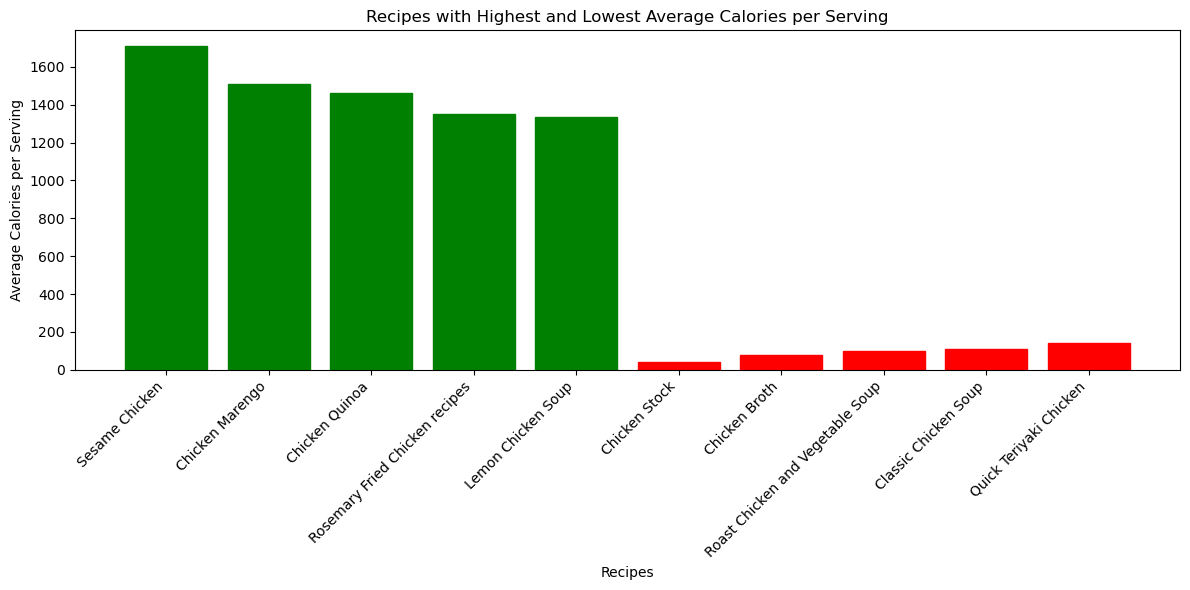

In [183]:
import matplotlib.pyplot as plt
import numpy as np

# Create a session to interact with the database
session = Session(engine)

# Query the ChickenRecipe table (case-insensitive filter) for the top 5 and bottom 5 average calories
top_results = session.query(ChickenRecipe.recipe_name,
                            func.avg(ChickenRecipe.calories_per_serving).label('average_calories_per_serving')) \
                     .group_by(ChickenRecipe.recipe_name) \
                     .order_by(func.avg(ChickenRecipe.calories_per_serving).desc()) \
                     .limit(5) \
                     .all()

bottom_results = session.query(ChickenRecipe.recipe_name,
                               func.avg(ChickenRecipe.calories_per_serving).label('average_calories_per_serving')) \
                        .group_by(ChickenRecipe.recipe_name) \
                        .order_by(func.avg(ChickenRecipe.calories_per_serving)) \
                        .limit(5) \
                        .all()

# Combine the top and bottom results
result = top_results + bottom_results

# Extract data for plotting
recipes = [row.recipe_name for row in result]
average_calories = [row.average_calories_per_serving for row in result]

# Plot the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(recipes, average_calories, color='blue')
plt.xlabel('Recipes')
plt.ylabel('Average Calories per Serving')
plt.title('Recipes with Highest and Lowest Average Calories per Serving')

# Color the bars differently for top and bottom results
for i in range(5):
    bars[i].set_color('green')  # Green for top 5
    bars[-(i + 1)].set_color('red')  # Red for bottom 5

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Close the session
session.close()

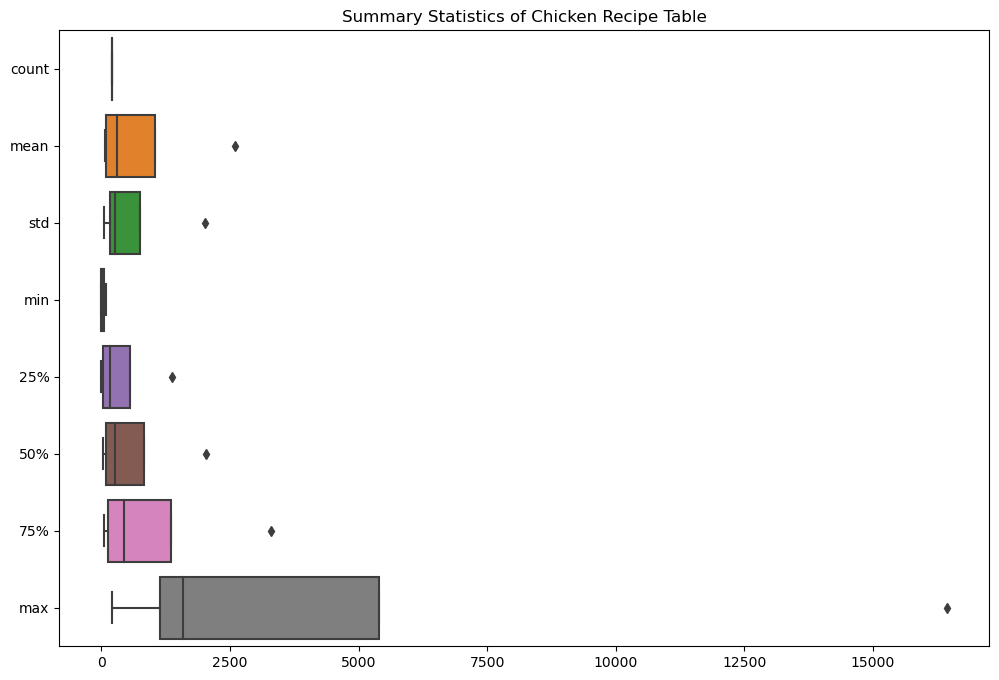

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a session to interact with the database
session = Session(engine)

# Query the ChickenRecipe table and load data into a Pandas DataFrame
result = session.query(ChickenRecipe).all()
df = pd.read_sql(session.query(ChickenRecipe).statement, session.bind)

# Display summary statistics
summary_statistics = df.describe()

# Plot a boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=summary_statistics.transpose(), orient='h')
plt.title('Summary Statistics of Chicken Recipe Table')
plt.show()

# Close the session
session.close()


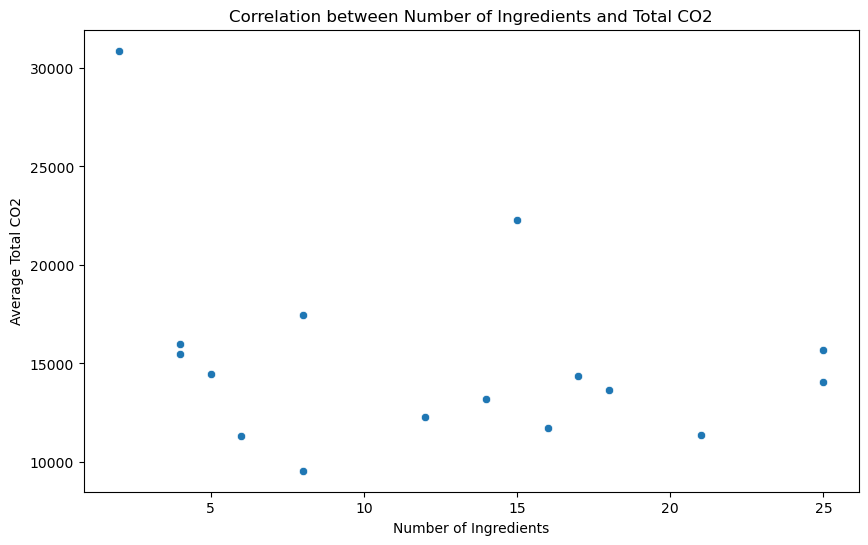

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

session = Session(engine)

# Query the ChickenRecipe table and load data into a Pandas DataFrame
result = session.query(func.count(CO2.number_of_ingredients).label('num_ingredients'),
                        func.avg(CO2.total_co2).label('avg_co2')) \
                .group_by('number_of_ingredients') \
                .all()
df = pd.DataFrame(result)

# Close the session
session.close()

# Create a scatter plot without a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_ingredients', y='avg_co2', data=df)
plt.title('Correlation between Number of Ingredients and Total CO2')
plt.xlabel('Number of Ingredients')
plt.ylabel('Average Total CO2')
plt.show()